In [1]:
# Import packages
import pandas as pd
import json
import matplotlib.pyplot as plt

# BoolQ dataset
Reading comprehension dataset designed to test if models can answer yes/no questions based on a given passage of text. Each observation includes:
- question: a yes/no question
- passage: a paragraph from a Wikipedia article
- answer: either true or false



In [28]:
# Load BoolQ dataset
train_boolQ = pd.read_json('data/boolQ_train.jsonl', lines=True)
dev_boolQ = pd.read_json('data/boolQ_dev.jsonl', lines=True)

train_boolQ.head()
print(len(train_boolQ))
dev_boolQ.head()
print(len(dev_boolQ))

# Merge train and dev datasets
boolQ = pd.concat([train_boolQ, dev_boolQ], ignore_index=True)

# Display a true example
true_example = boolQ[boolQ['answer'] == True].iloc[1]
print(true_example["question"], true_example["answer"], true_example["passage"])

false_example = boolQ[boolQ['answer'] == False].iloc[0]
print(false_example["question"], false_example["answer"], false_example["passage"])

# Get the number of examples in the dataset
print(len(boolQ))

# Count the number of true and false answers
true_count = boolQ[boolQ['answer'] == True].shape[0]
false_count = boolQ[boolQ['answer'] == False].shape[0]
print(f"Number of true answers: {true_count}")
print(f"Number of false answers: {false_count}")

# Create "context" column by copying the "passage" column
boolQ['context'] = boolQ['passage']

# Save boolQ to a new file as csv
boolQ.to_csv('data/boolQ.csv', index=False)

9427
3270
do good samaritan laws protect those who help at an accident True Good Samaritan laws offer legal protection to people who give reasonable assistance to those who are, or who they believe to be, injured, ill, in peril, or otherwise incapacitated. The protection is intended to reduce bystanders' hesitation to assist, for fear of being sued or prosecuted for unintentional injury or wrongful death. An example of such a law in common-law areas of Canada: a good Samaritan doctrine is a legal principle that prevents a rescuer who has voluntarily helped a victim in distress from being successfully sued for wrongdoing. Its purpose is to keep people from being reluctant to help a stranger in need for fear of legal repercussions should they make some mistake in treatment. By contrast, a duty to rescue law requires people to offer assistance and holds those who fail to do so liable.
is elder scrolls online the same as skyrim False As with other games in The Elder Scrolls series, the gam

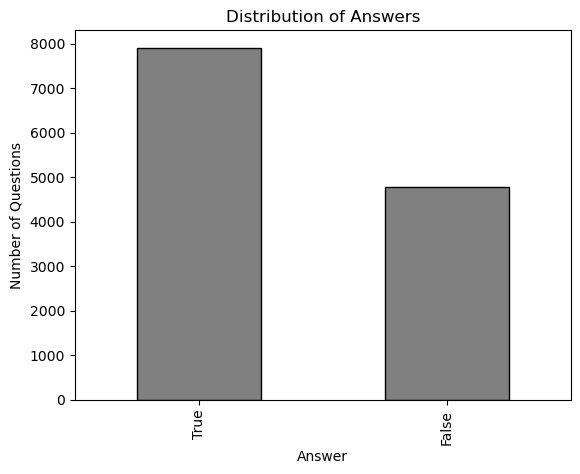

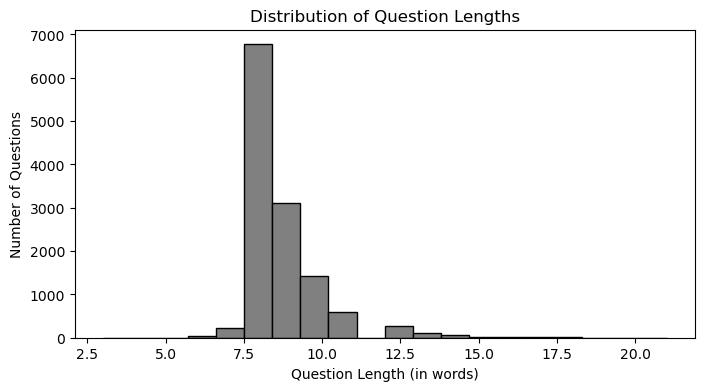

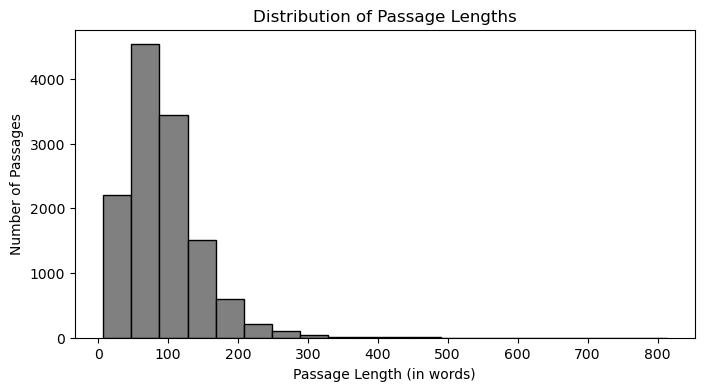

<Figure size 800x400 with 0 Axes>

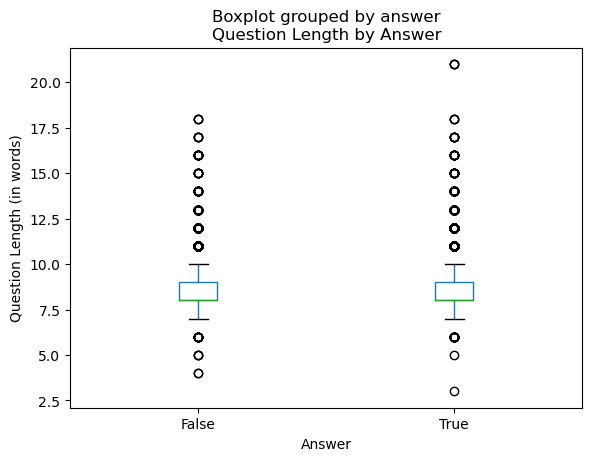

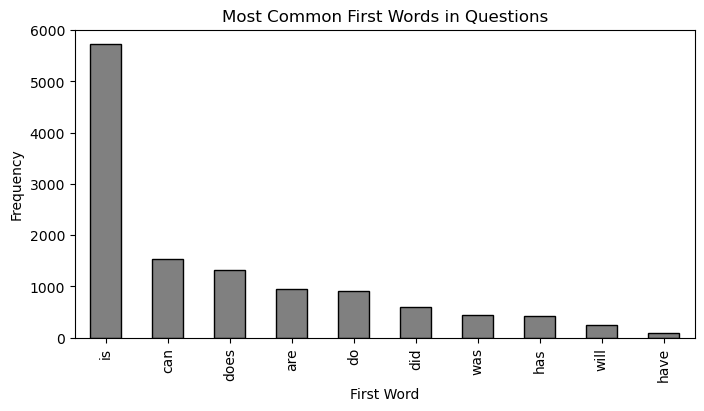

In [3]:
# Balance of true/false answers
boolQ['answer'].value_counts().plot(kind='bar', color='grey', edgecolor='black')
plt.xlabel('Answer')
plt.ylabel('Number of Questions')
plt.title('Distribution of Answers')
plt.savefig("figures/BoolQ/boolq_number_questions.png")
plt.show()

# Question length distribution
plt.figure(figsize=(8, 4))
boolQ['question_length'] = boolQ['question'].apply(lambda x: len(x.split()))
boolQ['question_length'].hist(bins=20, grid=False, color='grey', edgecolor='black')
plt.xlabel('Question Length (in words)')
plt.ylabel('Number of Questions')
plt.title('Distribution of Question Lengths')
plt.savefig("figures/BoolQ/boolq_question_length.png")
plt.show()

# Passage length distribution
plt.figure(figsize=(8, 4))
boolQ['passage_length'] = boolQ['passage'].apply(lambda x: len(x.split()))
boolQ['passage_length'].hist(bins=20, grid=False, color='grey', edgecolor='black')
plt.xlabel('Passage Length (in words)')
plt.ylabel('Number of Passages')
plt.title('Distribution of Passage Lengths')
plt.savefig("figures/BoolQ/boolq_passage_length.png")
plt.show()

# Compare lengths by answer
plt.figure(figsize=(8, 4))
boolQ.boxplot(column='question_length', by='answer', grid=False)
plt.xlabel('Answer')
plt.ylabel('Question Length (in words)')
plt.title('Question Length by Answer')
plt.show()

# Most common question words
plt.figure(figsize=(8, 4))
boolQ['first_word'] = boolQ['question'].apply(lambda x: x.split()[0].lower())
boolQ['first_word'].value_counts().head(10).plot(kind='bar', color='grey', edgecolor='black')
plt.xlabel('First Word')
plt.ylabel('Frequency')
plt.title('Most Common First Words in Questions')
plt.savefig("figures/BoolQ/boolq_first_words.png")
plt.show()


# GSM8K dataset
Dataset with grade school math word problems where each problem requires multi-step reasoning to solve it. It contains:
- question: math word problem
- answer: natural language explanation ending with the final answer

In [6]:
# Load GSM8k dataset
from datasets import load_dataset, concatenate_datasets

gsm8k = load_dataset("gsm8k", "main")
gsm8k = concatenate_datasets([gsm8k['train'], gsm8k['test']]).to_pandas()

print(gsm8k.head())
print(len(gsm8k))

example_gsm8k = gsm8k.iloc[5]
print(example_gsm8k['question'])
print(example_gsm8k['answer'])

README.md:   0%|          | 0.00/7.94k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/419k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7473 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1319 [00:00<?, ? examples/s]

                                            question  \
0  Natalia sold clips to 48 of her friends in Apr...   
1  Weng earns $12 an hour for babysitting. Yester...   
2  Betty is saving money for a new wallet which c...   
3  Julie is reading a 120-page book. Yesterday, s...   
4  James writes a 3-page letter to 2 different fr...   

                                              answer  
0  Natalia sold 48/2 = <<48/2=24>>24 clips in May...  
1  Weng earns 12/60 = $<<12/60=0.2>>0.2 per minut...  
2  In the beginning, Betty has only 100 / 2 = $<<...  
3  Maila read 12 x 2 = <<12*2=24>>24 pages today....  
4  He writes each friend 3*2=<<3*2=6>>6 pages a w...  
8792
Mark has a garden with flowers. He planted plants of three different colors in it. Ten of them are yellow, and there are 80% more of those in purple. There are only 25% as many green flowers as there are yellow and purple flowers. How many flowers does Mark have in his garden?
There are 80/100 * 10 = <<80/100*10=8>>8 more purp

In [7]:
# Save gsm8k as csv
gsm8k.to_csv('data/gsm8k.csv', index=False)

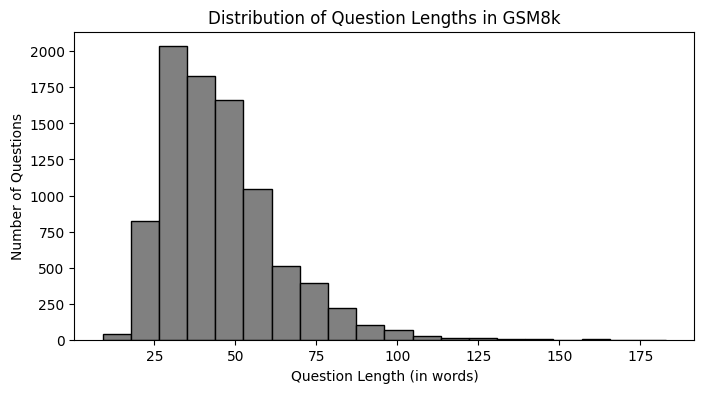

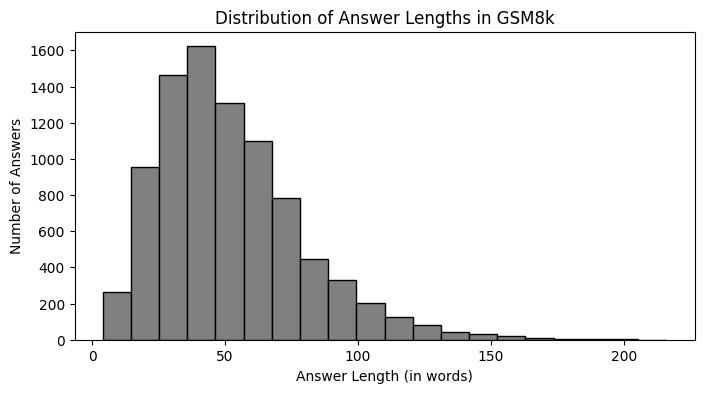

In [20]:
# Question length distribution
plt.figure(figsize=(8, 4))
gsm8k['question_length'] = gsm8k['question'].apply(lambda x: len(x.split()))
gsm8k['question_length'].hist(bins=20, grid=False, color='grey', edgecolor='black')
plt.xlabel('Question Length (in words)')
plt.ylabel('Number of Questions')
plt.title('Distribution of Question Lengths in GSM8k')
plt.savefig("figures/GSM8k/gsm8k_question_length.png")
plt.show()

# Answer length distribution
plt.figure(figsize=(8, 4))
gsm8k['answer_length'] = gsm8k['answer'].apply(lambda x: len(x.split()))
gsm8k['answer_length'].hist(bins=20, grid=False, color='grey', edgecolor='black')
plt.xlabel('Answer Length (in words)')
plt.ylabel('Number of Answers')
plt.title('Distribution of Answer Lengths in GSM8k')
plt.savefig("figures/GSM8k/gsm8k_answer_length.png")
plt.show()

In [18]:
# Extract numeric answers (after the ####)
gsm8k['numeric_answer'] = gsm8k['answer'].apply(lambda x: x.split('####')[-1].strip() if '####' in x else None)

# Remove commas from numeric answers
gsm8k['numeric_answer'] = gsm8k['numeric_answer'].str.replace(',', '', regex=False)

# check if all numeric answers are valid numbers (any positive or negative float)
for i, answer in enumerate(gsm8k['numeric_answer']):
    try:
        float(answer)
    except (ValueError, TypeError):
        print(f"Invalid numeric answer at index {i}: {answer}")
print(gsm8k['numeric_answer'].head())

# Save gsm8k with numeric answers as csv
gsm8k.to_csv('data/gsm8k_cleaned.csv', index=False)

0     72
1     10
2      5
3     42
4    624
Name: numeric_answer, dtype: object
